# **Week 5 Class Assignment**
## **0706022310044 - Heidy Mudita Sutedjo**

In [121]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [122]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [123]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [124]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


# Data Preprocessing

In [125]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [126]:
# Drop Employee_ID as it's only an identifier.

df = df.drop(columns=['Employee_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

# Feature Encoding

In [127]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Marital_Status', 'Department', 'Job_Role']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
134,55,0,2.0,0.0,3.0,5,3941,48,8,12,2,1,5,3,87,1,8,37,19,1,3,3,17,4,0
434,52,0,2.0,3.0,0.0,1,11219,96,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3,0
215,58,0,1.0,3.0,3.0,1,19122,56,28,11,0,3,1,3,23,1,6,42,12,2,3,3,48,2,1
500,50,1,2.0,4.0,0.0,3,3066,32,17,9,1,3,1,2,18,0,8,37,15,3,4,1,32,4,1
744,53,1,1.0,2.0,3.0,4,10995,65,17,2,1,1,5,3,53,1,3,49,11,3,3,3,4,2,0


In [128]:
# checking encode result
df.loc[627]

,627
Age,51
Gender,Female
Marital_Status,Single
Department,HR
Job_Role,Analyst
Job_Level,1
Monthly_Income,3983
Hourly_Rate,54
Years_at_Company,19
Years_in_Current_Role,12


## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).

In [129]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [130]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [131]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


## Split data

### Subtask:
Split the encoded data into training and testing sets.

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [133]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 24), (300, 24))

In [134]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,1.0,2,6144,65,21,9,7,2,3,2,14,0,8,40,13,1,1,4,34,2
68,59,0,2.0,4.0,2.0,3,3935,24,7,7,2,2,2,1,39,0,7,55,12,3,2,4,19,2
479,56,0,1.0,4.0,3.0,1,15478,99,17,8,8,4,3,2,35,0,3,43,6,2,4,4,5,2
399,49,1,1.0,1.0,3.0,4,9040,35,29,10,7,1,4,1,16,1,9,51,17,4,3,4,45,1
434,52,0,2.0,3.0,0.0,1,11219,96,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3


In [135]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,3.0,2,16465,32,10,10,2,4,2,4,6,1,7,51,18,2,2,3,8,4
859,25,0,0.0,1.0,0.0,5,18871,51,16,10,8,4,1,1,4,0,3,44,4,1,4,4,19,3
298,43,1,1.0,0.0,2.0,4,11226,81,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
553,58,0,0.0,4.0,1.0,3,18859,58,8,1,3,1,3,4,89,0,8,46,3,2,2,3,17,3
672,31,0,2.0,4.0,3.0,3,10509,19,23,1,4,3,1,3,79,0,7,48,7,4,1,4,36,1


# Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       245
           1       0.17      0.25      0.21        55

    accuracy                           0.64       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.70      0.64      0.66       300



## We can see that the model is overfitting because of the imbalance dataset.

# Feature Importance

In [137]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.0942405  0.         0.00615298 0.04680261 0.01132708 0.01093863
 0.13878439 0.10140446 0.03037343 0.03905787 0.04605842 0.01681815
 0.01722835 0.0242438  0.06135087 0.         0.02308524 0.06983762
 0.03667562 0.0329973  0.01360133 0.02650834 0.1191331  0.03337992]


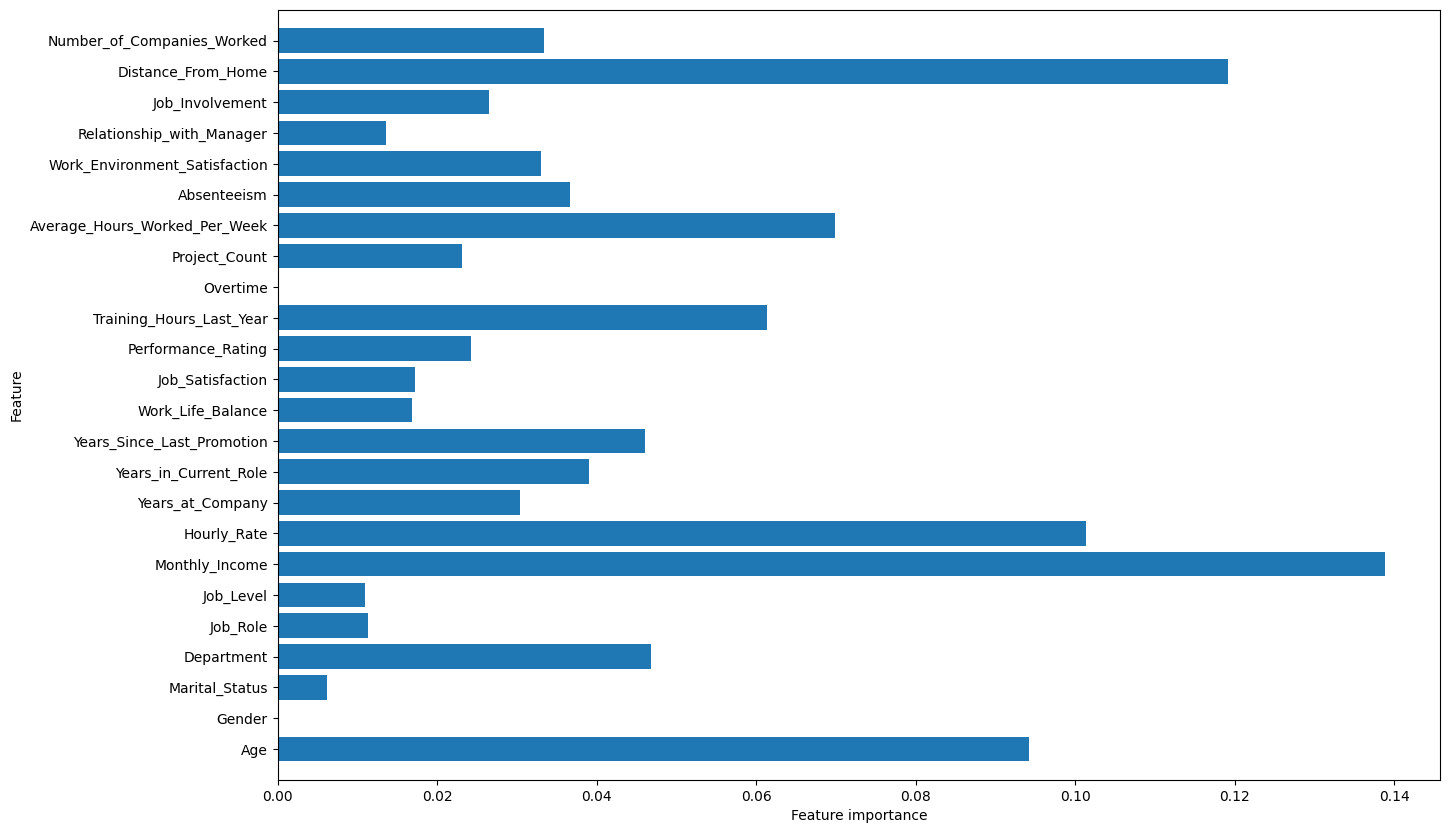

In [138]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [139]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
Monthly_Income,0.138784
Distance_From_Home,0.119133
Hourly_Rate,0.101404
Age,0.094241
Average_Hours_Worked_Per_Week,0.069838
Training_Hours_Last_Year,0.061351


In [140]:
# using only important features for the prediction
important_features = ["Monthly_Income", "Distance_From_Home", "Hourly_Rate",
    "Age", "Average_Hours_Worked_Per_Week", "Training_Hours_Last_Year"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [141]:
display(X_importance)
display(y_importance)

,Monthly_Income,Distance_From_Home,Hourly_Rate,Age,Average_Hours_Worked_Per_Week,Training_Hours_Last_Year
0,15488,20,28,58,54,14
1,13079,25,28,48,45,6
2,13744,45,24,34,34,77
3,6809,35,26,27,48,49
4,10206,44,52,40,33,64
...,...,...,...,...,...,...
995,4172,24,76,27,46,76
996,11007,39,71,47,36,53
997,4641,33,43,50,46,7
998,19855,41,92,28,52,54


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


# Imbalance Data

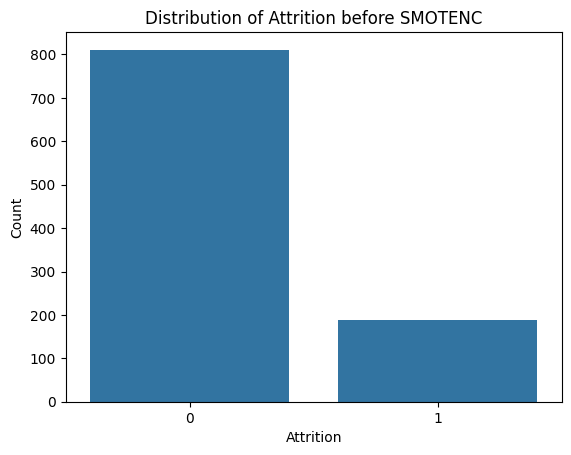

In [142]:
# just to visualize the distribution of target class before SMOTENC

sns.countplot(x=y_importance)
plt.title('Distribution of Attrition before SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# As we can see, the dataset is very imbalance, with 0 have a lot more datas,
# that is why the model perform way better on the 0 value data

# Oversampling Using SMOTE - NC

In [143]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTE

# # we should define the categorical features first to make oversampling more accurate
# categorical_features = ['Department']

smote = SMOTE(random_state=0)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 6), (487, 6))

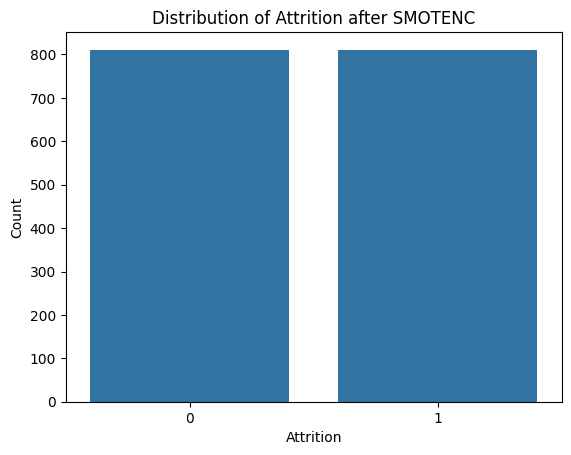

In [144]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_importance)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [145]:
# BUILD CLASSIFICATION MODEL but with no parameters
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       244
           1       0.70      0.76      0.73       243

    accuracy                           0.71       487
   macro avg       0.72      0.71      0.71       487
weighted avg       0.72      0.71      0.71       487



# K-Fold Cross Validation

In [146]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_importance, y_importance):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [147]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 0), X_importance, y_importance, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.72941176 0.74375    0.70440252 0.72206304 0.70623145]
Average score: 0.72


# Hyperparameter Tuning using Grid Search

In [148]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.703


# Classification Report

In [149]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       567
           1       0.81      0.96      0.88       568

    accuracy                           0.87      1135
   macro avg       0.88      0.87      0.87      1135
weighted avg       0.88      0.87      0.87      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       244
           1       0.66      0.85      0.74       243

    accuracy                           0.71       487
   macro avg       0.73      0.71      0.70       487
weighted avg       0.73      0.71      0.70       487



# **Baseline vs Tuned Model Comparison**



*   The baseline decision tree is heavily overfitted (poor precision (0.17) and recall (0.25)), causing it fail to generalize
*   The tuned decision tree is already optimized with oversampling, feature importance, K-Fold, and hyperparameter tuning, making it able to achieve:

1.   Better balance between precision & recall
2.   Higher test accuracy
3. Improved performance on minority classes (Major improvement on Class 1's F1 Score (0.21 -> 0.74), Recall (0.25 -> 0.85), Precision (0.17 -> 0.66))

Overall. the tuned model is a lot better, trading a bit of training accuracy for far better generalization and fairness between classes.



